## Linear Regression Assignment

Build a model for predection of bike rental daily count base on th environmental and seasonal settings

### STEPS

 - Importing python packages
 - Reading, undertanding and visualize the data
 - Preparing Data
 - Training the model
 - Residual analisys
 - Predictions and evaluations on the test set

#### Step 0 - importing python packages and modules required for the creation of the model

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(np.__version__)
print(pd.__version__)
#print(matplotlib.pyplot.__version__)
print(sns.__version__)
print(sklearn.__version__)
print(sm.__version__)


1.20.3
1.3.4
0.11.2
0.24.2
0.12.2


#### Step 1 - Reading, understanding and visualizing the data

In [30]:
#Reading the data set
bikerenting =  pd.read_csv("day.csv")
#Checking some of the records
bikerenting.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [31]:
#Data set structure
bikerenting.shape

(730, 16)

In [32]:
#Search for missing values
#rule : if 30% is null we should ignore the variable
bikerenting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [33]:
bikerenting.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


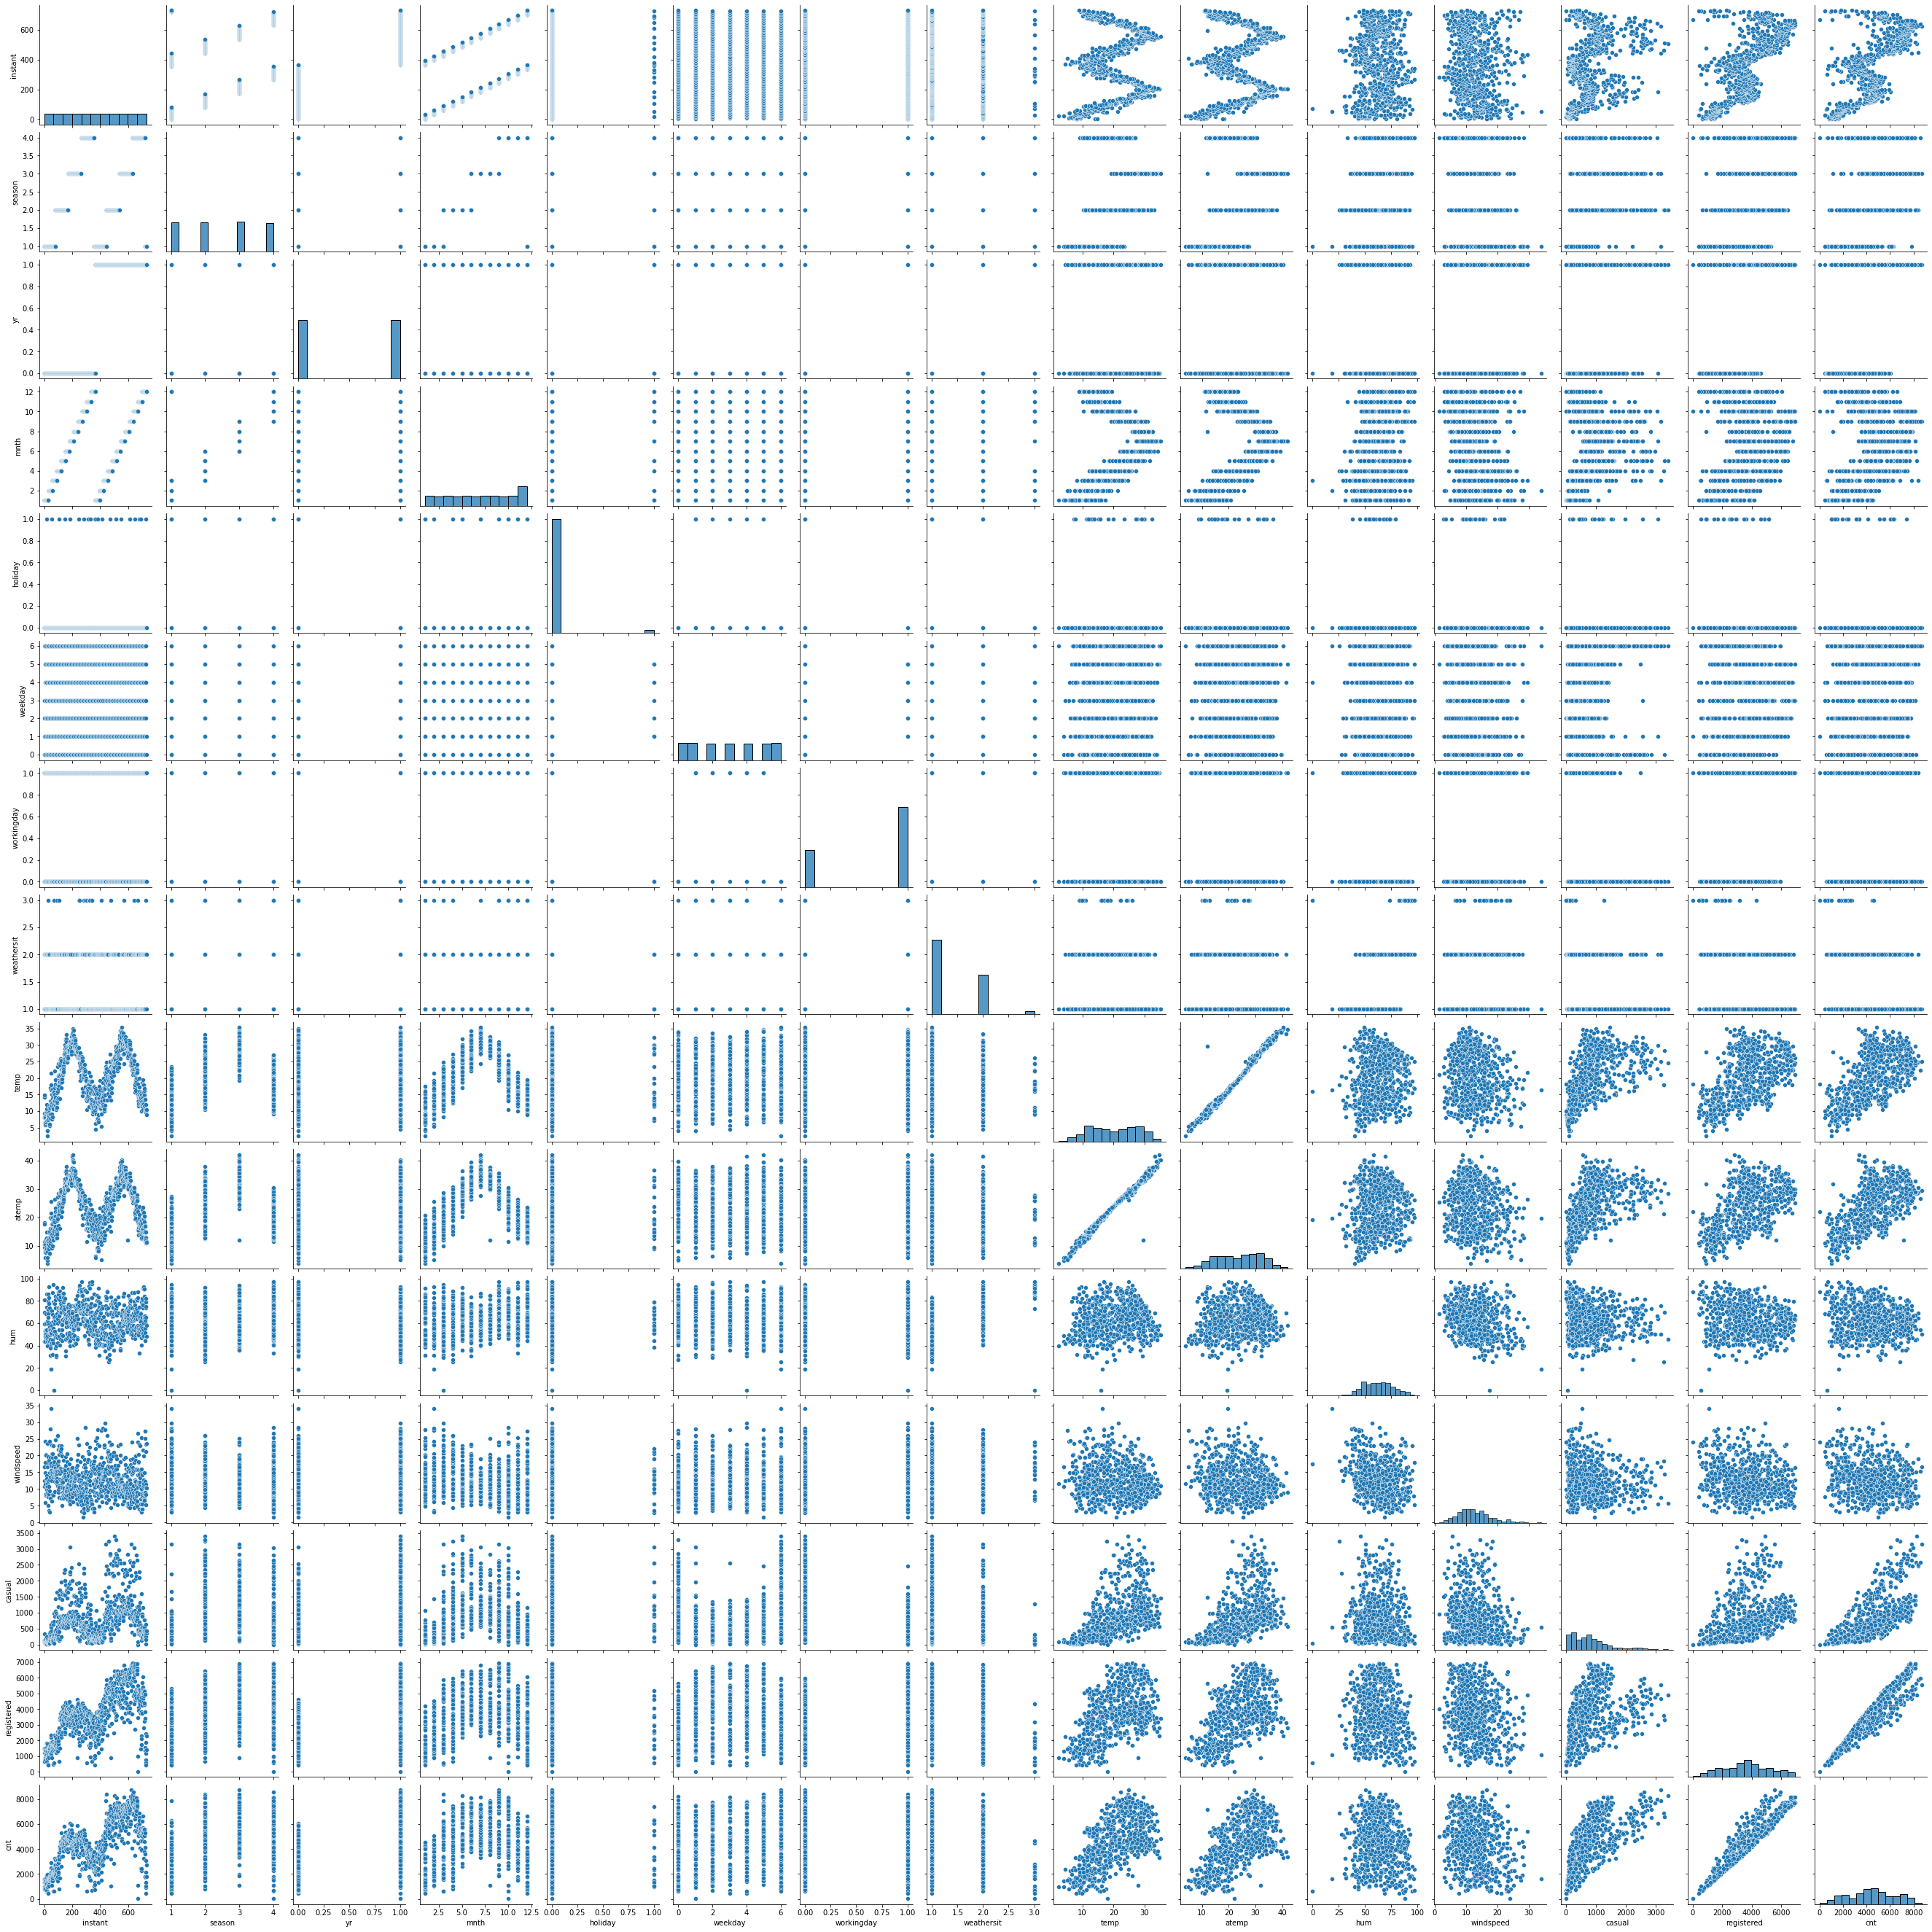

In [34]:
#Lets visualize the data
sns.pairplot(bikerenting)
plt.show()

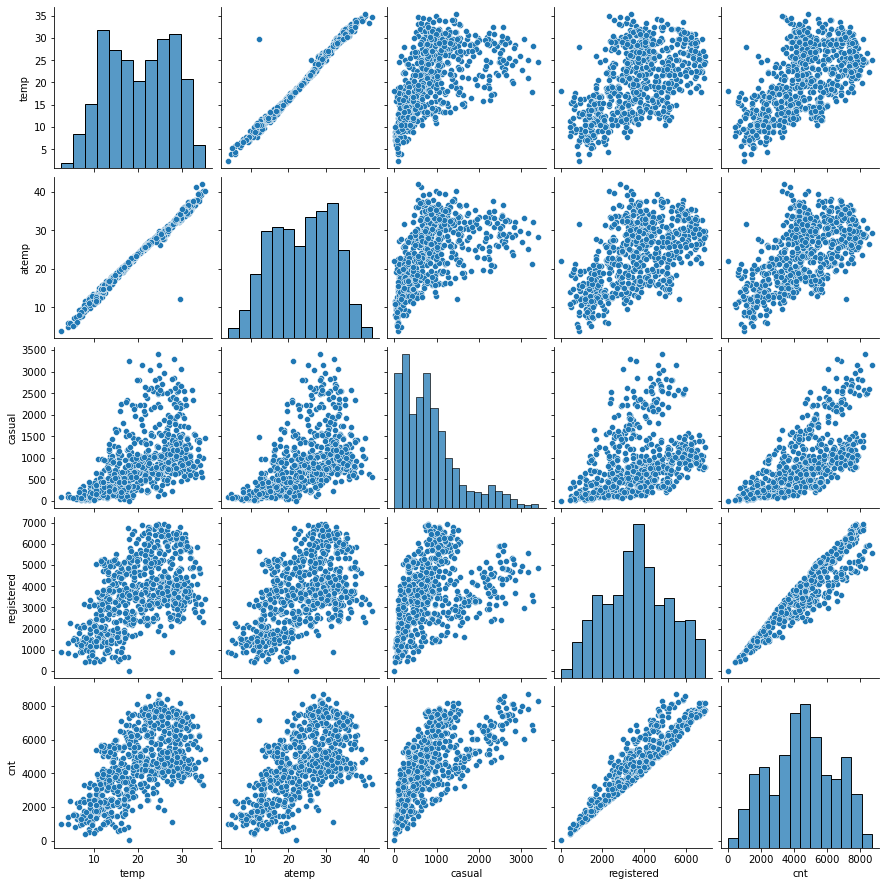

In [35]:
# there seems to be a positive correlation bettween the temperature and the number of rentals (either registered or casual)
sns.pairplot(bikerenting[['temp','atemp','casual','registered','cnt']])
plt.show()

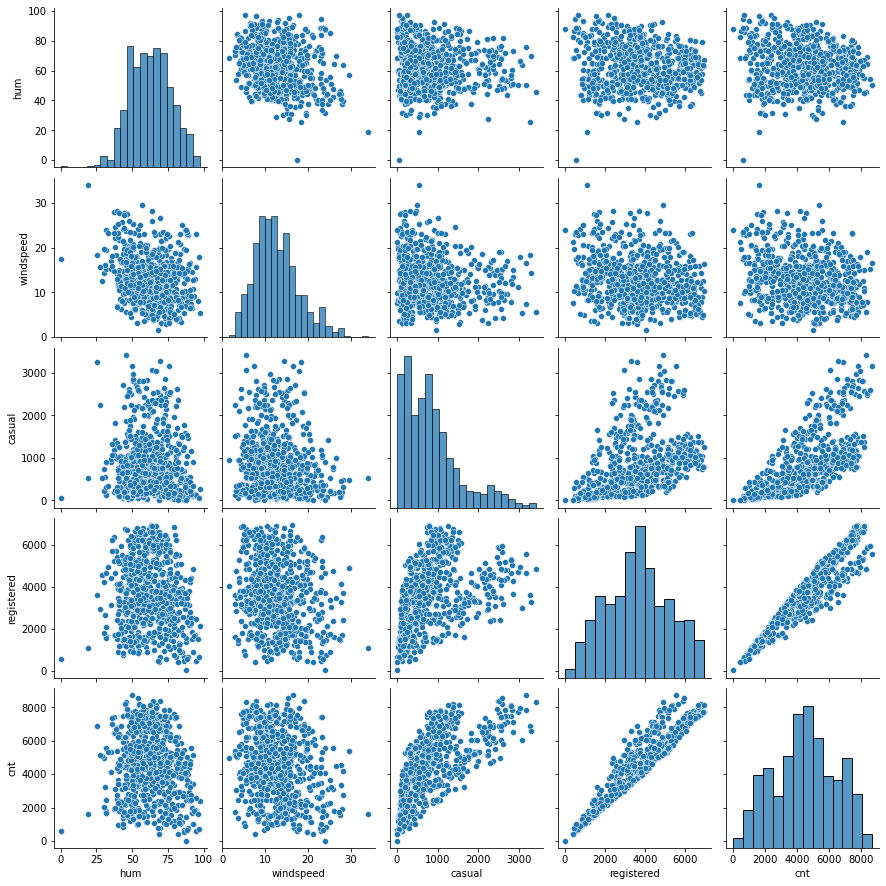

In [36]:
# it seems there isn't a relation between wind or humidity and number of rentals (either registered or casual)
sns.pairplot(bikerenting[['hum','windspeed','casual','registered','cnt']])
plt.show()

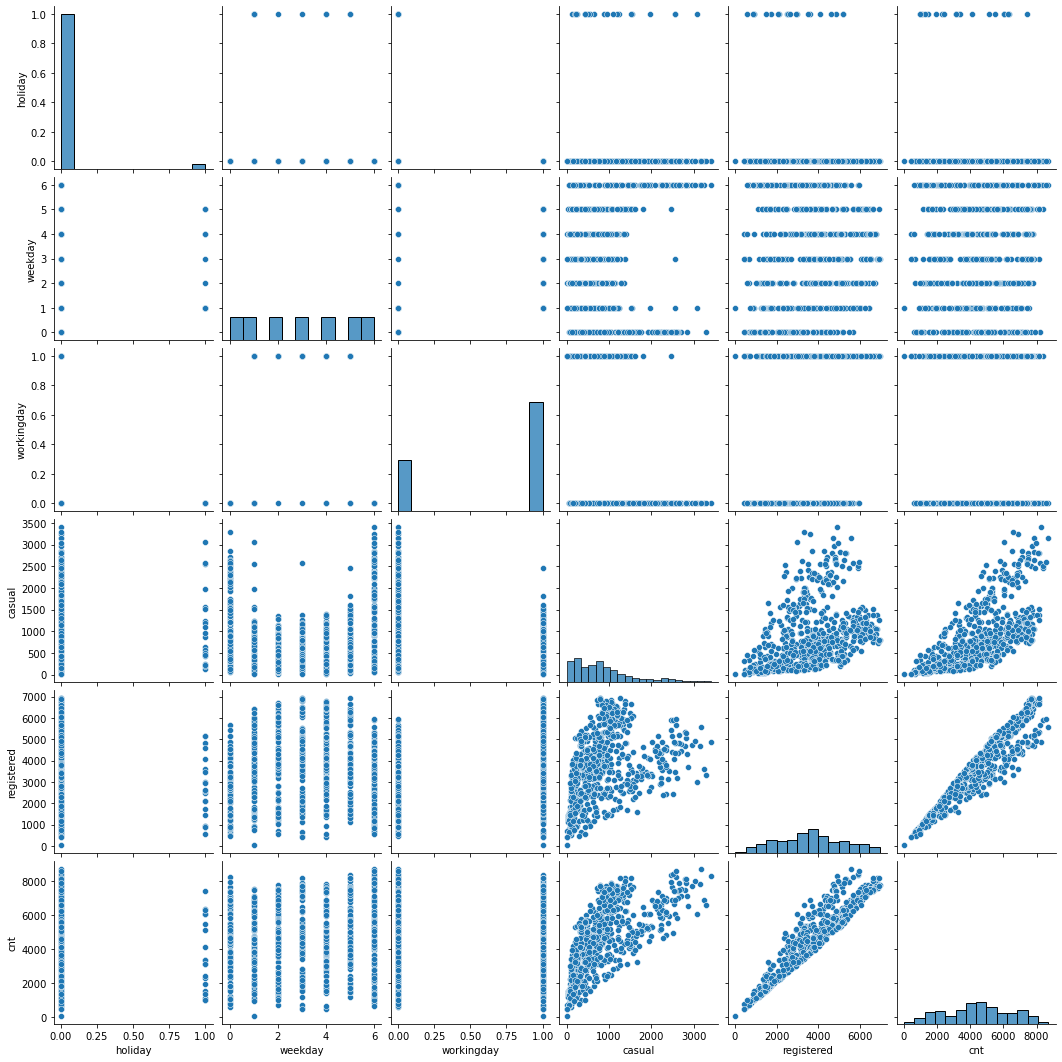

In [37]:
# The day of the week also seems to have some impact on the number of rentals
sns.pairplot(bikerenting[['holiday','weekday','workingday','casual','registered','cnt']])
plt.show()
#Because these are categorial variables we need use a diferent visualization

In [38]:
#visualize categorical variables

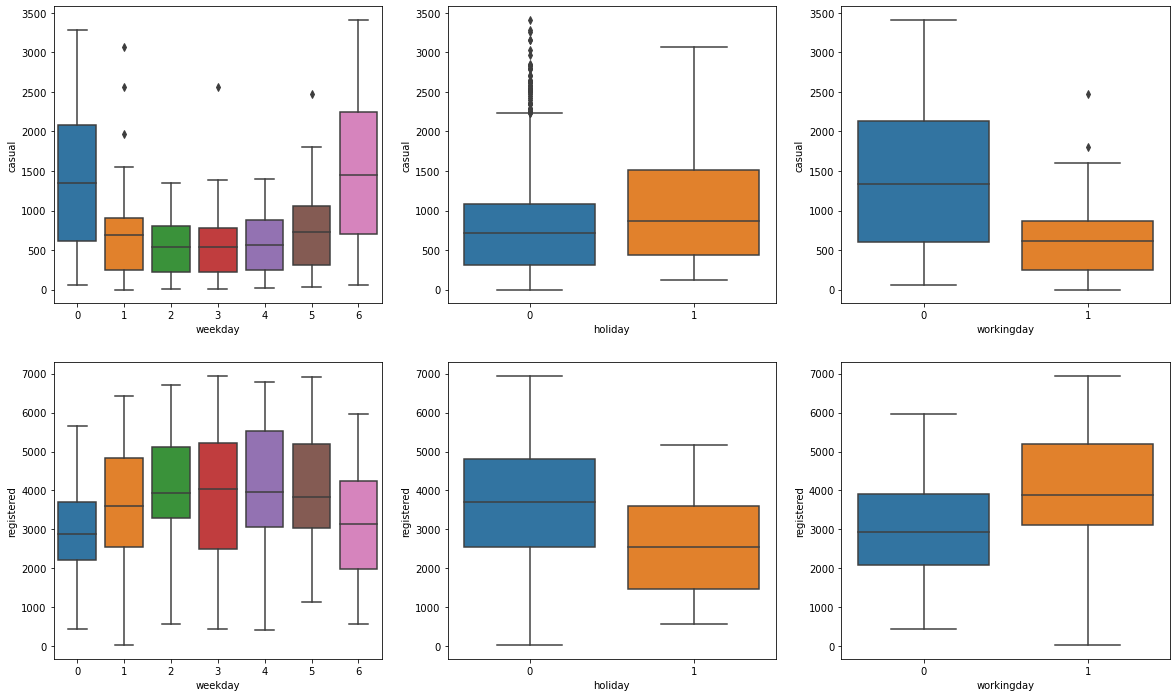

In [39]:
# Looking at the histograms bellow its clear that
# 1 - Registered users have less rentals on holidays while Causal users have more rentals on holidays
# 2 - Registered users have more rentals on working days  while Causal users have less rentals on working days

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='weekday', y='casual', data=bikerenting)
plt.subplot(2,3,2)
sns.boxplot(x='holiday', y='casual', data=bikerenting)
plt.subplot(2,3,3)
sns.boxplot(x='workingday', y='casual', data=bikerenting)
plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='registered', data=bikerenting)
plt.subplot(2,3,5)
sns.boxplot(x='holiday', y='registered', data=bikerenting)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='registered', data=bikerenting)
plt.show()

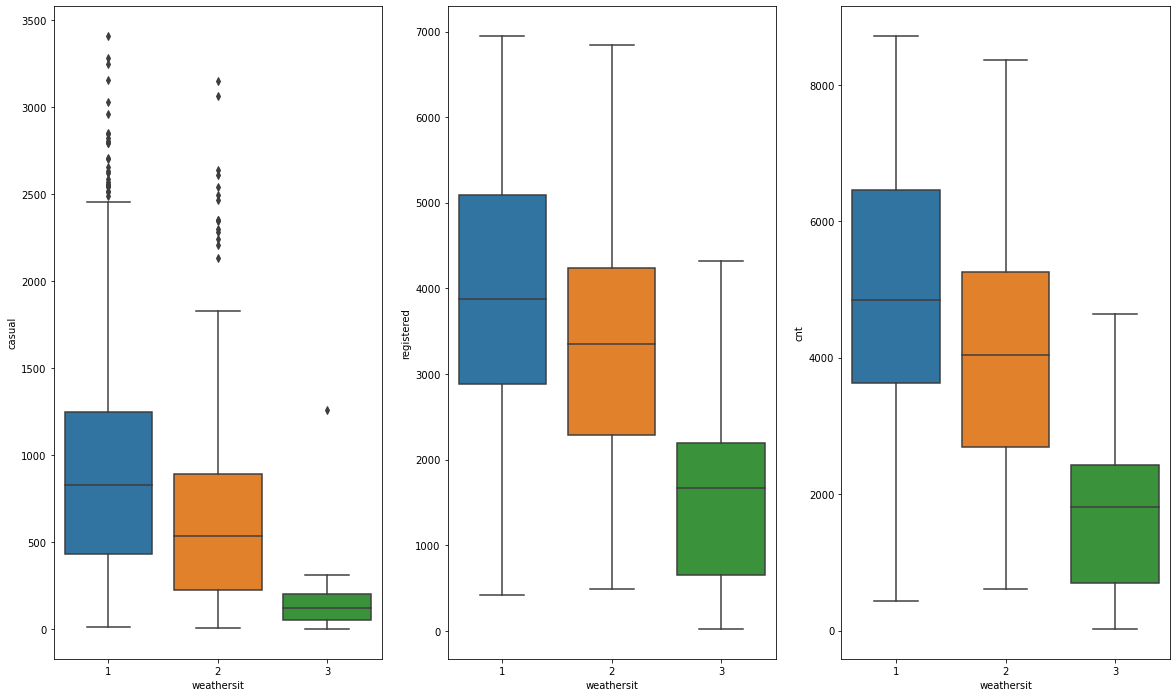

In [40]:
# Weather conditions seem to affect causal and registered users, if weather conditions deteriorate the number of rentals reduces.
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
sns.boxplot(x='weathersit', y='casual', data=bikerenting)
plt.subplot(1,3,2)
sns.boxplot(x='weathersit', y='registered', data=bikerenting)
plt.subplot(1,3,3)
sns.boxplot(x='weathersit', y='cnt', data=bikerenting)
plt.show()

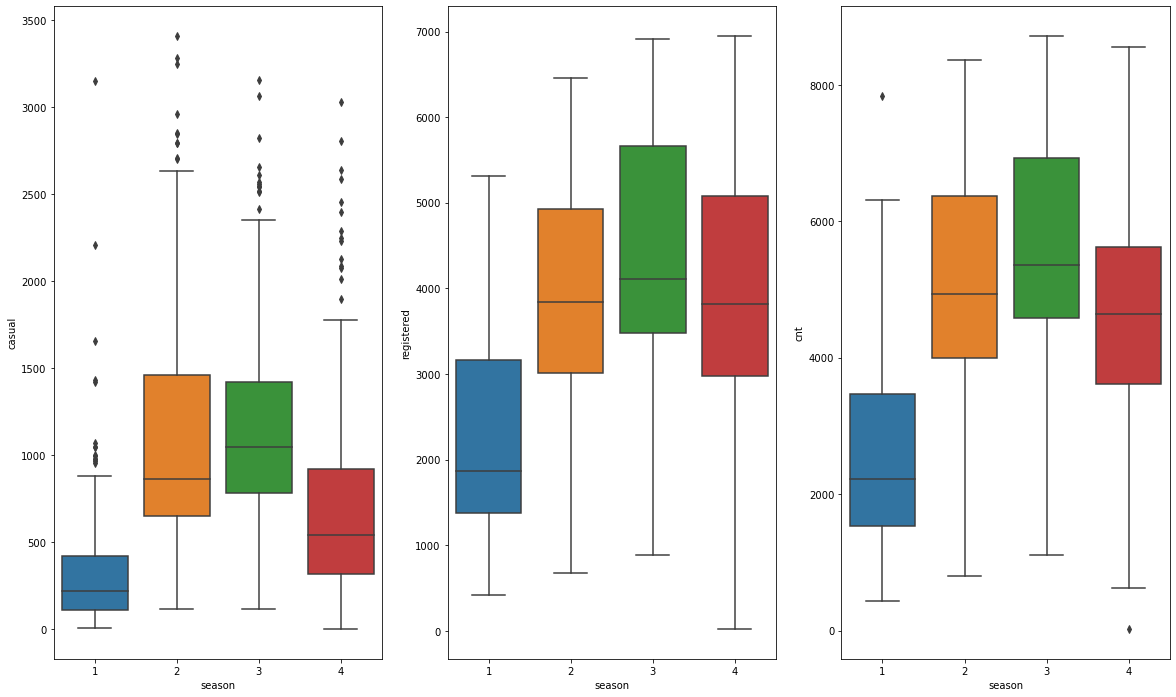

In [41]:
# Season also seems to have some influence on rentals: summer and fall have more rentals than spring and winter.
# Causal rentals occur evenly on summer and fall
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
sns.boxplot(x='season', y='casual', data=bikerenting)
plt.subplot(1,3,2)
sns.boxplot(x='season', y='registered', data=bikerenting)
plt.subplot(1,3,3)
sns.boxplot(x='season', y='cnt', data=bikerenting)
plt.show()

<AxesSubplot:xlabel='yr', ylabel='cnt'>

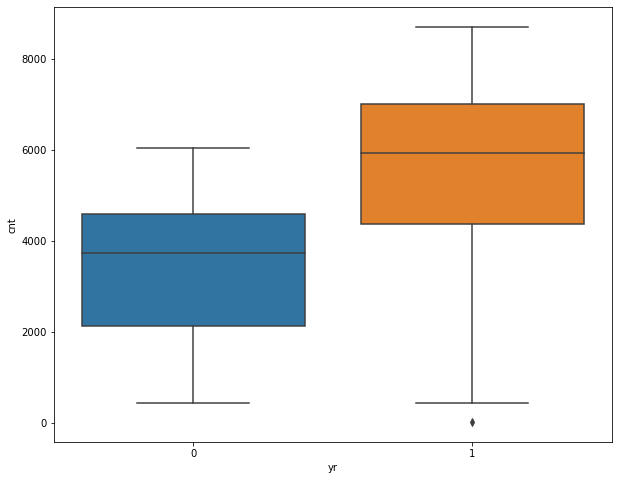

In [14]:
#Rentals are increasing from year 2018 to 2019, but is suficient storical data
plt.figure(figsize=(10,8))
sns.boxplot(x='yr', y='cnt', data=bikerenting)

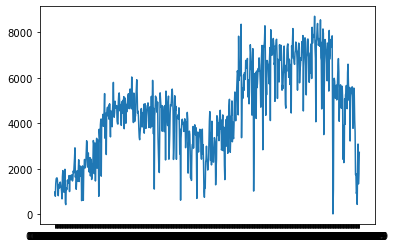

In [42]:
# based on the line chart bellow we do see a decrease at the end of 2019 so we cannot conclude there is a correlation betwee date
# and number of rentals
plt.plot(bikerenting['dteday'], bikerenting['cnt'])
plt.show()

#### Step 2 - Preparing data for modeling
 - encondig
 - spliting into train and test
 - rescaling

##### Step 2 - Encoding

In [43]:
# yes and no values are already converted to 0 and 1 at the data source ('day.csv')

In [44]:
# Variables "yr", "holiday" and "workingday" only had 2 possible values and are already handled correctly

In [45]:
# Dummmy variables - weathersit
weathersit = pd.get_dummies(bikerenting['weathersit'])
weathersit.columns = ['Sun', 'Clouds', 'Rain']
weathersit

,Sun,Clouds,Rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,1,0
726,0,1,0
727,0,1,0
728,1,0,0


In [46]:
# change 3 dummy collumns to 2 collumns. Why using 3 if we can use 2
#droping redundant dummy bar
weathersit = pd.get_dummies(bikerenting['weathersit'],drop_first=True)
weathersit.columns = ['clouds', 'rain']
weathersit.head()

,clouds,rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [47]:
# join to original dataframe
bikerenting= pd.concat([bikerenting,weathersit], axis=1)
bikerenting.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [48]:
#lets remove weathersit
bikerenting = bikerenting.drop('weathersit', axis=1)
bikerenting.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain
0,1,01-01-2018,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0
1,2,02-01-2018,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0
2,3,03-01-2018,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,04-01-2018,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,05-01-2018,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [49]:
# Dummmy variables - season
season = pd.get_dummies(bikerenting['season'])
season.columns = ['spring', 'summer', 'fall','winter']
season.head()

,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [50]:
# change 4 dummy collumns to 3 collumns. Why using 4 if we can use 3
#droping redundant dummy bar
season = pd.get_dummies(bikerenting['season'],drop_first=True)
season.columns = ['summer', 'fall','winter']
season.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [51]:
# join to original dataframe
bikerenting= pd.concat([bikerenting,season], axis=1)
bikerenting.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain,summer,fall,winter
0,1,01-01-2018,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [52]:
#lets remove season
bikerenting = bikerenting.drop('season', axis=1)
bikerenting.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain,summer,fall,winter
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [53]:
#We can drop weekday, year,month,instant, dteday
#lets remove season
bikerenting = bikerenting.drop('yr', axis=1)
bikerenting = bikerenting.drop('mnth', axis=1)
bikerenting = bikerenting.drop('weekday', axis=1)
bikerenting = bikerenting.drop('instant', axis=1)
bikerenting = bikerenting.drop('dteday', axis=1)
bikerenting.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain,summer,fall,winter
0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [57]:
# lets drop registered and causals since the study is the target variable "cnt"
bikerenting = bikerenting.drop('casual', axis=1)
bikerenting = bikerenting.drop('registered', axis=1)
bikerenting.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,clouds,rain,summer,fall,winter
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


##### Step 2 - split data into train and test

In [58]:
bikerenting_train, bikerenting_test = train_test_split(bikerenting,train_size = 0.7,random_state=100)
print(bikerenting_train.shape)
print(bikerenting_test.shape)

(510, 12)
(220, 12)


##### Step 2 - rescale

In [60]:
# There are very diferent values, for exmeple "temp" and "causal", we should rescale
# we want all variable to be at comparable scales, for interpretability reasosn
# if we use min max we compress the data between 0 and 1 
scaler = MinMaxScaler()

# we only want to scale numerical
# create list of only numerical lables
num_vars = ['temp','atemp','hum','windspeed','cnt']

#fit data
# there are 3 types
# fit() learns xmin and xmax
# transform()
# fit_transform() does both

bikerenting_train[num_vars] = scaler.fit_transform(bikerenting_train[num_vars])
bikerenting_train.head()

C:\Users\SergioFontes\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,holiday,workingday,temp,atemp,hum,windspeed,cnt,clouds,rain,summer,fall,winter
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,1,0,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,1,0,0


##### Step 3 - Training the model

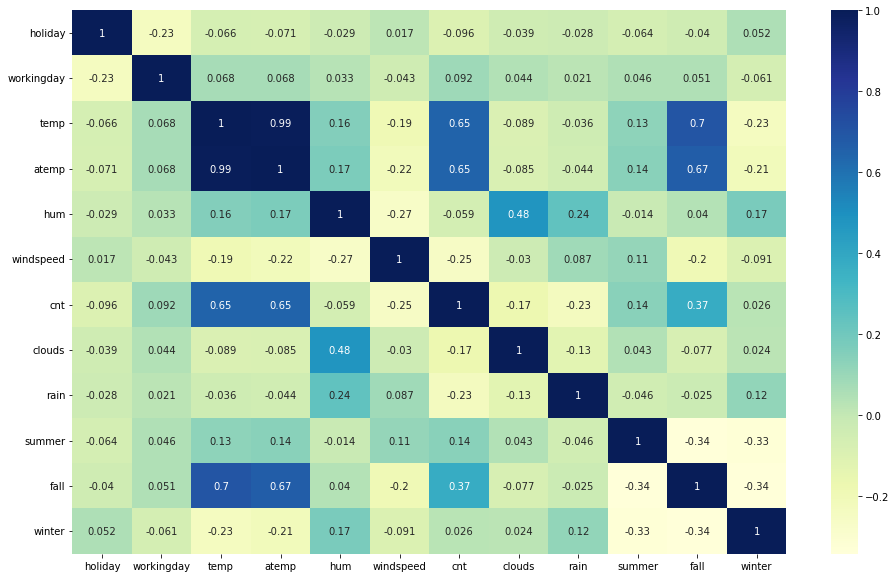

In [61]:
# lets draw heat map
# it will teal us that there is a coorelation between temperature and rentals like we suspected from the data visualization
plt.figure(figsize= (16,10))
sns.heatmap(bikerenting_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

In [62]:
# we need to separate the X from Y
y_train = bikerenting_train.pop('cnt')
y_train.head()


576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [63]:
X_train = bikerenting_train
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,clouds,rain,summer,fall,winter
576,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0
426,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,1,0,1,0,0
111,0,1,0.345824,0.318819,0.751824,0.380981,1,0,1,0,0


In [64]:
# we need to check statistical significant of variables
# if independent variables (predictors) are correlated we need to rmeove them form the model, because they don't add value to it.
# we could go variable by variable or qe can do it in one action
# buil model with all variables
X_train_sm = sm.add_constant(X_train)

#create the second model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# lets check params
lr_model.params

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.343427
holiday      -0.077812
workingday    0.023683
temp          0.645191
atemp        -0.027542
hum          -0.257179
windspeed    -0.191197
clouds       -0.035922
rain         -0.249058
summer        0.097014
fall          0.034329
winter        0.157020
dtype: float64

In [65]:
#lets determine p values. p values above 0.5 are significant
# we will see that temperature is significant
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     60.69
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.10e-84
Time:                        17:42:38   Log-Likelihood:                 255.75
No. Observations:                 510   AIC:                            -487.5
Df Residuals:                     498   BIC:                            -436.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3434      0.044      7.720      0.000       0.256       0.431
holiday       -0.0778      0.043     -1.807      0.071      -0.162       0.007
workingday     0.0237      0.015      1.633      0.103      -0.005       0.052
temp           0.6452      0.221      2.919      0.004       0.211       1.080
atemp         -0.0275      0.226     -0.122      0.903      -0.472       0.417
hum           -0.2572      0.061     -4.198      0.000      -0.378      -0.137
windspeed     -0.1912      0.043     -4.433      0.000      -0.276      -0.106
clouds        -0.0359      0.017     -2.085      0.038      -0.070      -0.002
rain          -0.2491      0.043     -5.737      0.000      -0.334      -0.164
summer         0.0970      0.024      3.997      0.000       0.049       0.145
fall           0.0343      0.033      1.047      0.295      -0.030       0.099
winter         0.1570      0.021      7.541      0.000       0.116       0.198
==============================================================================
Omnibus:                        9.657   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                6.658
Skew:                           0.145   Prob(JB):                       0.0358
Kurtosis:                       2.521   Cond. No.                         82.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# lets search for colinearity calculating VIF = 1 / (1 - Rsquare)
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
2,temp,384.99
3,atemp,364.60
4,hum,16.36
9,fall,6.53
5,windspeed,3.78
8,summer,3.37
1,workingday,3.12
10,winter,2.48
6,clouds,2.14
7,rain,1.17


In [67]:
# what collumn should we drop? 

## high p-value and high VIF »»» Drop
## high p-value and low VIF »»» remove these first
## low p-value and high VIF »»» remove these after
## low p-value and low VIF »»» we keep

# what collumn should we drop? "atemp" that has big p value or "temp" with VIF very high?

# we should remove "atemp"
X = X_train.drop('atemp',axis=1)

In [68]:
#create a new model
# buil model with all variables
X_train_sm = sm.add_constant(X)

#create the second model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# lets check params
lr_model.params

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.343129
holiday      -0.077612
workingday    0.023691
temp          0.619085
hum          -0.257555
windspeed    -0.190187
clouds       -0.035862
rain         -0.248701
summer        0.096962
fall          0.034793
winter        0.156874
dtype: float64

In [69]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     66.89
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.32e-85
Time:                        17:49:47   Log-Likelihood:                 255.74
No. Observations:                 510   AIC:                            -489.5
Df Residuals:                     499   BIC:                            -442.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3431      0.044      7.732      0.000       0.256       0.430
holiday       -0.0776      0.043     -1.806      0.072      -0.162       0.007
workingday     0.0237      0.014      1.635      0.103      -0.005       0.052
temp           0.6191      0.054     11.476      0.000       0.513       0.725
hum           -0.2576      0.061     -4.213      0.000      -0.378      -0.137
windspeed     -0.1902      0.042     -4.498      0.000      -0.273      -0.107
clouds        -0.0359      0.017     -2.085      0.038      -0.070      -0.002
rain          -0.2487      0.043     -5.748      0.000      -0.334      -0.164
summer         0.0970      0.024      4.000      0.000       0.049       0.145
fall           0.0348      0.033      1.070      0.285      -0.029       0.099
winter         0.1569      0.021      7.554      0.000       0.116       0.198
==============================================================================
Omnibus:                        9.582   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                6.589
Skew:                           0.142   Prob(JB):                       0.0371
Kurtosis:                       2.521   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# lets search for colinearity calculating VIF = 1 / (1 - Rsquare)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
2,temp,22.12
3,hum,16.03
8,fall,6.44
4,windspeed,3.63
7,summer,3.37
1,workingday,3.12
9,winter,2.47
5,clouds,2.13
6,rain,1.16
0,holiday,1.09


In [71]:
# we should remove "fall"
X = X.drop('fall',axis=1)

In [72]:
#create a new model
# buil model with all variables
X_train_sm = sm.add_constant(X)

#create the second model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# lets check params
lr_model.params

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.340360
holiday      -0.078362
workingday    0.023762
temp          0.665571
hum          -0.263972
windspeed    -0.195418
clouds       -0.034297
rain         -0.244846
summer        0.077738
winter        0.144114
dtype: float64

In [77]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     78.31
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           2.67e-83
Time:                        17:58:40   Log-Likelihood:                 245.73
No. Observations:                 510   AIC:                            -473.5
Df Residuals:                     501   BIC:                            -435.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1913      0.028      6.718      0.000       0.135       0.247
holiday       -0.0806      0.044     -1.843      0.066      -0.167       0.005
workingday     0.0246      0.015      1.672      0.095      -0.004       0.054
temp           0.6305      0.031     20.029      0.000       0.569       0.692
windspeed     -0.1432      0.041     -3.497      0.001      -0.224      -0.063
clouds        -0.0770      0.014     -5.386      0.000      -0.105      -0.049
rain          -0.3182      0.040     -7.883      0.000      -0.398      -0.239
summer         0.0750      0.017      4.530      0.000       0.042       0.107
winter         0.1298      0.017      7.647      0.000       0.096       0.163
==============================================================================
Omnibus:                       12.695   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.230
Skew:                           0.165   Prob(JB):                       0.0163
Kurtosis:                       2.472   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# lets search for colinearity calculating VIF = 1 / (1 - Rsquare)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
3,hum,15.24
2,temp,7.58
4,windspeed,3.51
1,workingday,3.12
5,clouds,2.11
8,winter,1.65
7,summer,1.52
6,rain,1.15
0,holiday,1.09


In [74]:
# we should remove "hum"
X = X.drop('hum',axis=1)

In [75]:
#create a new model
# buil model with all variables
X_train_sm = sm.add_constant(X)

#create the second model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# lets check params
lr_model.params

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.191332
holiday      -0.080621
workingday    0.024644
temp          0.630457
windspeed    -0.143214
clouds       -0.076961
rain         -0.318242
summer        0.074972
winter        0.129807
dtype: float64

In [78]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     78.31
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           2.67e-83
Time:                        18:01:19   Log-Likelihood:                 245.73
No. Observations:                 510   AIC:                            -473.5
Df Residuals:                     501   BIC:                            -435.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1913      0.028      6.718      0.000       0.135       0.247
holiday       -0.0806      0.044     -1.843      0.066      -0.167       0.005
workingday     0.0246      0.015      1.672      0.095      -0.004       0.054
temp           0.6305      0.031     20.029      0.000       0.569       0.692
windspeed     -0.1432      0.041     -3.497      0.001      -0.224      -0.063
clouds        -0.0770      0.014     -5.386      0.000      -0.105      -0.049
rain          -0.3182      0.040     -7.883      0.000      -0.398      -0.239
summer         0.0750      0.017      4.530      0.000       0.042       0.107
winter         0.1298      0.017      7.647      0.000       0.096       0.163
==============================================================================
Omnibus:                       12.695   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.230
Skew:                           0.165   Prob(JB):                       0.0163
Kurtosis:                       2.472   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# lets search for colinearity calculating VIF = 1 / (1 - Rsquare)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
2,temp,3.61
3,windspeed,3.11
1,workingday,2.90
6,summer,1.51
4,clouds,1.50
7,winter,1.38
5,rain,1.08
0,holiday,1.07


In [ ]:
# VIF values are now bellow 5 and p values are low we have our model.

#### Step 4 - residual analisys

In [79]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.691999
426    0.356713
728    0.250892
482    0.411802
111    0.377453
         ...   
578    0.733873
53     0.327767
350    0.338827
79     0.429791
520    0.540904
Length: 510, dtype: float64

C:\Users\SergioFontes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

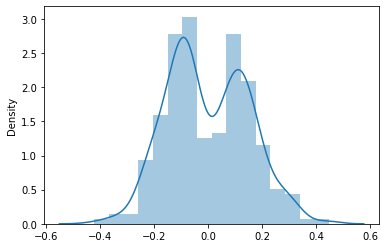

In [80]:
# let see if error distribution is normal and centered on zero
res = y_train - y_train_pred
sns.distplot(res)

### Step 5 - Predictions and Evaluation

In [82]:
# we never fit on the test set (only the training)
# we transform the training set 

num_vars = ['temp','atemp','hum','windspeed','cnt']
bikerenting_test[num_vars] = scaler.transform(bikerenting_test[num_vars])
bikerenting_test.head()

C:\Users\SergioFontes\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,holiday,workingday,temp,atemp,hum,windspeed,cnt,clouds,rain,summer,fall,winter
184,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,0,1,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,1,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,1,0,0,0,1
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,1,0,0


In [84]:
bikerenting_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,clouds,rain,summer,fall,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.318182,0.027273,0.263636,0.245455,0.236364
std,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.466833,0.163248,0.441609,0.431338,0.425817
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
y_test =bikerenting_test.pop('cnt')
X_test = bikerenting_test
#add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,holiday,workingday,temp,atemp,hum,windspeed,clouds,rain,summer,fall,winter
184,1.0,1,0,0.831783,0.769660,0.657364,0.084219,1,0,0,1,0
535,1.0,0,1,0.901354,0.842587,0.610133,0.153728,0,0,1,0,0
299,1.0,0,1,0.511964,0.496145,0.837699,0.334206,1,0,0,0,1
221,1.0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0
152,1.0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,1,0,0


In [88]:
X_test_sm = X_test_sm.drop(['hum','fall','atemp'], axis=1)

In [89]:
#predict

y_test_pred = lr_model.predict(X_test_sm)

In [91]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred= y_test_pred)

0.48049023499154575

# Based on r2 only 48% of the variance on our model is explained by the independent variables